<a href="https://colab.research.google.com/github/Sharu708/Student_Performance_Prediction_System/blob/main/Student_performance_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp

from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
# Load data
student_mat = pd.read_csv('student-mat.csv', delimiter=';')
student_por = pd.read_csv('student-por.csv', delimiter=';')

In [ ]:
# Shape
print("Shape Math course:", student_mat.shape)
student_mat.head()


Shape Math course: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
print ("Shape Portuguese language course:",student_por.shape)
student_por.head()

Shape Portuguese language course: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
# Combine students based on columns:
# "school", "sex", "age", "address", "famsize", "Pstatus", "Medu",
# "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"

# Join datasets
student_both = pd.merge(left=student_mat,right=student_por,how='inner',on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
print ("Shape of data:", student_both.shape)

Shape of data: (382, 53)


In [ ]:
# Check for duplicates
duplicated = student_mat[student_mat.duplicated()==True]
duplicated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
# Check for duplicates
duplicated = student_por[student_por.duplicated()==True]
duplicated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
# Utility functions to evaluate data
def evaluate_data(df):
    # Check for range of unique values for the train data
    for i in range(df.shape[1]):
        vals = np.unique(df.iloc[:, i])
        if len(vals) < 15:
            print(df.columns[i], ': (Categorical) {} unique value(s) - {}'.format(len(vals), vals))
        else:
            if df.iloc[:, i].dtype == object:
                print(
                    df.columns[i],
                    ': (Continuous) range of values of type string {',
                    df.iloc[:, i].unique().size,
                    ' values}'
                )
            else:
                print(
                    df.columns[i],
                    ': (Continuous) range of values - ',
                    '[ {} to {}]'.format(
                        df.iloc[:, i].min(),
                        df.iloc[:, i].max()
                    ),
                    ' {',
                    df.iloc[:, i].unique().size,
                    ' values}'
                )


def columns_with_null(df):
    cnt = 0
    for column in df.columns:
        df_missing = df[df[column].isnull()]
        if df_missing.shape[0] > 0:
            print(
                "Column",
                column,
                "contain null values / Count =",
                df_missing.shape[0]
            )
            cnt += 1

    if cnt == 0:
        print("The dataframe does not have 'null' values in any column")


In [ ]:
# Evalute the data
evaluate_data(student_mat)

school : (Categorical) 2 unique value(s) - ['GP' 'MS']
sex : (Categorical) 2 unique value(s) - ['F' 'M']
age : (Categorical) 8 unique value(s) - [15 16 17 18 19 20 21 22]
address : (Categorical) 2 unique value(s) - ['R' 'U']
famsize : (Categorical) 2 unique value(s) - ['GT3' 'LE3']
Pstatus : (Categorical) 2 unique value(s) - ['A' 'T']
Medu : (Categorical) 5 unique value(s) - [0 1 2 3 4]
Fedu : (Categorical) 5 unique value(s) - [0 1 2 3 4]
Mjob : (Categorical) 5 unique value(s) - ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : (Categorical) 5 unique value(s) - ['at_home' 'health' 'other' 'services' 'teacher']
reason : (Categorical) 4 unique value(s) - ['course' 'home' 'other' 'reputation']
guardian : (Categorical) 3 unique value(s) - ['father' 'mother' 'other']
traveltime : (Categorical) 4 unique value(s) - [1 2 3 4]
studytime : (Categorical) 4 unique value(s) - [1 2 3 4]
failures : (Categorical) 4 unique value(s) - [0 1 2 3]
schoolsup : (Categorical) 2 unique value(s) - ['no' 

In [ ]:
# Evalute the data
evaluate_data(student_por)

school : (Categorical) 2 unique value(s) - ['GP' 'MS']
sex : (Categorical) 2 unique value(s) - ['F' 'M']
age : (Categorical) 8 unique value(s) - [15 16 17 18 19 20 21 22]
address : (Categorical) 2 unique value(s) - ['R' 'U']
famsize : (Categorical) 2 unique value(s) - ['GT3' 'LE3']
Pstatus : (Categorical) 2 unique value(s) - ['A' 'T']
Medu : (Categorical) 5 unique value(s) - [0 1 2 3 4]
Fedu : (Categorical) 5 unique value(s) - [0 1 2 3 4]
Mjob : (Categorical) 5 unique value(s) - ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : (Categorical) 5 unique value(s) - ['at_home' 'health' 'other' 'services' 'teacher']
reason : (Categorical) 4 unique value(s) - ['course' 'home' 'other' 'reputation']
guardian : (Categorical) 3 unique value(s) - ['father' 'mother' 'other']
traveltime : (Categorical) 4 unique value(s) - [1 2 3 4]
studytime : (Categorical) 4 unique value(s) - [1 2 3 4]
failures : (Categorical) 4 unique value(s) - [0 1 2 3]
schoolsup : (Categorical) 2 unique value(s) - ['no' 

In [ ]:
# Get the columns which have null data
columns_with_null(student_mat)

The dataframe does not have 'null' values in any column


In [ ]:
# Get the columns which have null data
columns_with_null(student_por)

The dataframe does not have 'null' values in any column


In [ ]:
# Perform one hot encoding
def perform_one_hot_encoding(df,column):
    one_hot = pd.get_dummies(df[column],prefix=column+"_")
    df =  df.drop(column,axis=1)
    df =  df.join(one_hot)
    return df

def process_data_one_hot_encoding(data,categorical_columns):
    data_one_hot = data.copy()
    for column in categorical_columns:
        data_one_hot = perform_one_hot_encoding(data_one_hot,column)

    return data_one_hot

In [ ]:
# Categorical Columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus'
                       , 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
                       , 'schoolsup', 'famsup', 'paid', 'activities', 'nursery'
                       , 'higher', 'internet', 'romantic', 'famrel', 'freetime'
                       , 'goout', 'Dalc', 'Walc', 'health']

# Convert String columns to categorical
student_mat_processed = process_data_one_hot_encoding(student_mat,categorical_columns)
student_por_processed = process_data_one_hot_encoding(student_por,categorical_columns)

In [ ]:
# Shape
print ("shape Math course:",student_mat_processed.shape)
student_mat_processed.head()

shape Math course: (395, 91)


,age,traveltime,studytime,failures,absences,G1,G2,G3,school__GP,school__MS,...,Walc__1,Walc__2,Walc__3,Walc__4,Walc__5,health__1,health__2,health__3,health__4,health__5
0,18,2,2,0,6,5,6,6,True,False,...,True,False,False,False,False,False,False,True,False,False
1,17,1,2,0,4,5,5,6,True,False,...,True,False,False,False,False,False,False,True,False,False
2,15,1,2,3,10,7,8,10,True,False,...,False,False,True,False,False,False,False,True,False,False
3,15,1,3,0,2,15,14,15,True,False,...,True,False,False,False,False,False,False,False,False,True
4,16,1,2,0,4,6,10,10,True,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
# Shape
print ("Shape Portuguese language course:",student_por_processed.shape)
student_por_processed.head()

Shape Portuguese language course: (649, 91)


,age,traveltime,studytime,failures,absences,G1,G2,G3,school__GP,school__MS,...,Walc__1,Walc__2,Walc__3,Walc__4,Walc__5,health__1,health__2,health__3,health__4,health__5
0,18,2,2,0,4,0,11,11,True,False,...,True,False,False,False,False,False,False,True,False,False
1,17,1,2,0,2,9,11,11,True,False,...,True,False,False,False,False,False,False,True,False,False
2,15,1,2,0,6,12,13,12,True,False,...,False,False,True,False,False,False,False,True,False,False
3,15,1,3,0,0,14,14,14,True,False,...,True,False,False,False,False,False,False,False,False,True
4,16,1,2,0,0,11,13,13,True,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
student_mat_processed["pass"] = (student_mat_processed["G3"] >= 10).astype(int)
student_por_processed["pass"] = (student_por_processed["G3"] >= 10).astype(int)



In [ ]:
student_mat_processed.head()

,age,traveltime,studytime,failures,absences,G1,G2,G3,school__GP,school__MS,...,Walc__2,Walc__3,Walc__4,Walc__5,health__1,health__2,health__3,health__4,health__5,pass
0,18,2,2,0,6,5,6,6,True,False,...,False,False,False,False,False,False,True,False,False,0
1,17,1,2,0,4,5,5,6,True,False,...,False,False,False,False,False,False,True,False,False,0
2,15,1,2,3,10,7,8,10,True,False,...,False,True,False,False,False,False,True,False,False,1
3,15,1,3,0,2,15,14,15,True,False,...,False,False,False,False,False,False,False,False,True,1
4,16,1,2,0,4,6,10,10,True,False,...,True,False,False,False,False,False,False,False,True,1


In [ ]:
student_por_processed.head()

,age,traveltime,studytime,failures,absences,G1,G2,G3,school__GP,school__MS,...,Walc__2,Walc__3,Walc__4,Walc__5,health__1,health__2,health__3,health__4,health__5,pass
0,18,2,2,0,4,0,11,11,True,False,...,False,False,False,False,False,False,True,False,False,1
1,17,1,2,0,2,9,11,11,True,False,...,False,False,False,False,False,False,True,False,False,1
2,15,1,2,0,6,12,13,12,True,False,...,False,True,False,False,False,False,True,False,False,1
3,15,1,3,0,0,14,14,14,True,False,...,False,False,False,False,False,False,False,False,True,1
4,16,1,2,0,0,11,13,13,True,False,...,True,False,False,False,False,False,False,False,True,1


In [ ]:
# Numerical Columns
numerical_columns = ['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']

In [ ]:
student_mat_processed[numerical_columns].head()

,age,traveltime,studytime,failures,absences,G1,G2,G3
0,18,2,2,0,6,5,6,6
1,17,1,2,0,4,5,5,6
2,15,1,2,3,10,7,8,10
3,15,1,3,0,2,15,14,15
4,16,1,2,0,4,6,10,10


In [ ]:
# Compute the summary stats
student_mat_processed[numerical_columns].describe()

,age,traveltime,studytime,failures,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.697505,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000





VISUALIZATION

Distribution of Pass vs Fail (Bar Plot)

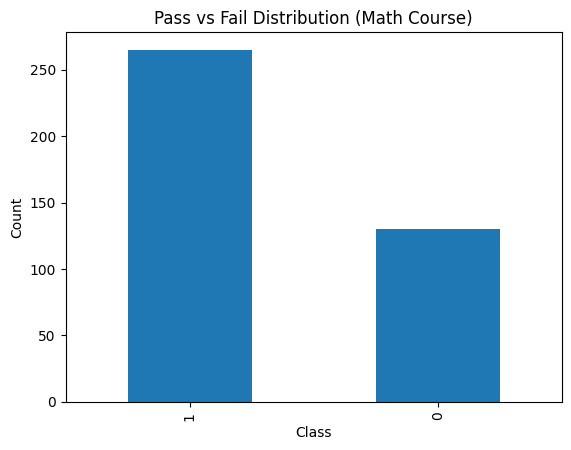

In [ ]:

plt.figure()
student_mat_processed["pass"].value_counts().plot(kind="bar")
plt.title("Pass vs Fail Distribution (Math Course)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


**Box Plot: Grades vs Pass/Fail**

<Figure size 640x480 with 0 Axes>

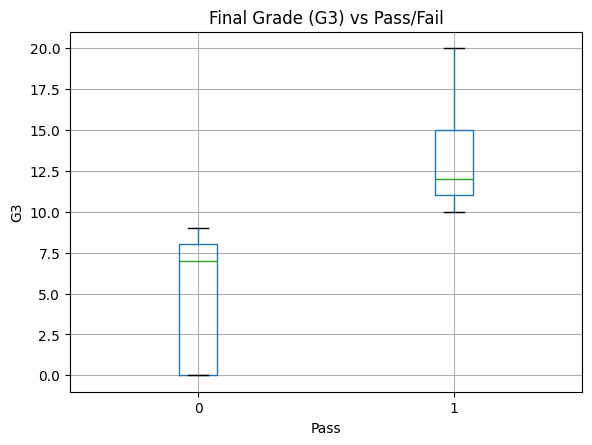

In [ ]:
plt.figure()
student_mat_processed.boxplot(column="G3", by="pass")
plt.title("Final Grade (G3) vs Pass/Fail")
plt.suptitle("")
plt.xlabel("Pass")
plt.ylabel("G3")
plt.show()


**Box Plot for Key Numerical Features**

<Figure size 640x480 with 0 Axes>

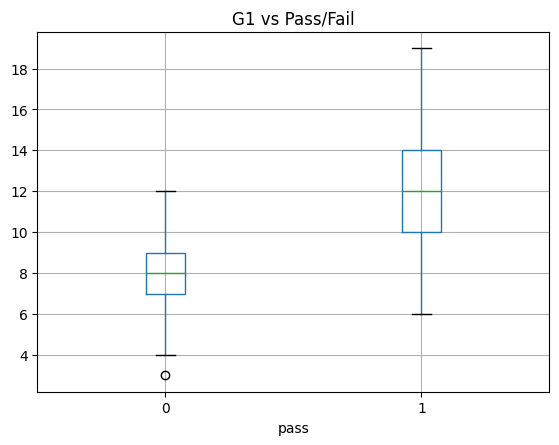

<Figure size 640x480 with 0 Axes>

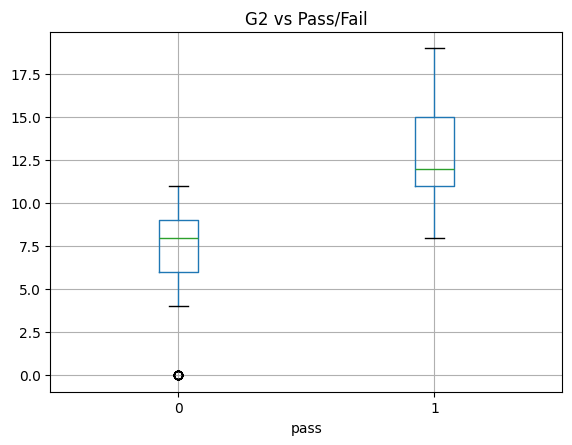

<Figure size 640x480 with 0 Axes>

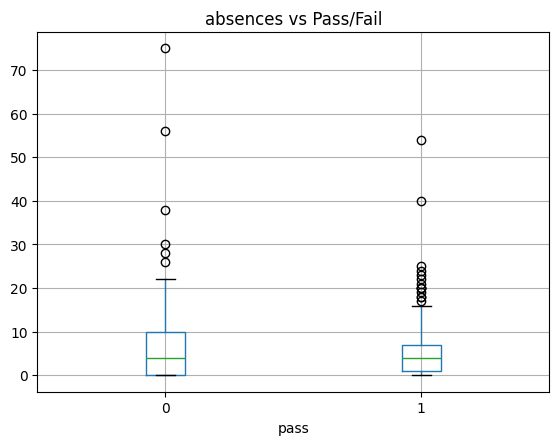

<Figure size 640x480 with 0 Axes>

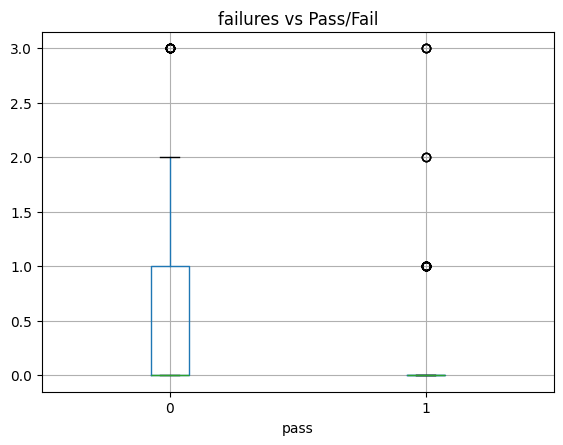

In [ ]:
for col in ["G1", "G2", "absences", "failures"]:
    plt.figure()
    student_mat_processed.boxplot(column=col, by="pass")
    plt.title(f"{col} vs Pass/Fail")
    plt.suptitle("")
    plt.show()

**Correlation Heatmap (Numerical Features)**

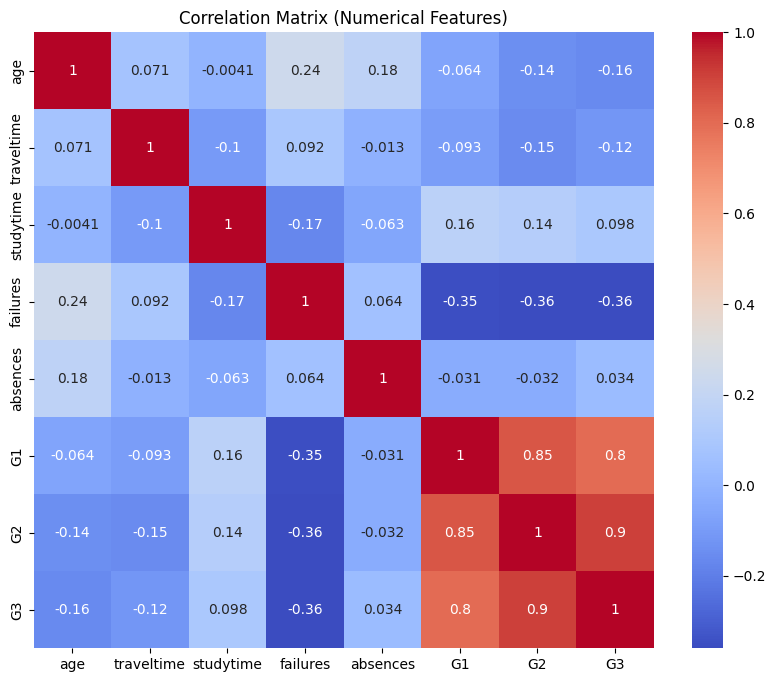

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = student_mat_processed[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

**Prepare Data for Modeling**

In [ ]:
from sklearn.model_selection import train_test_split

predictors = student_mat_processed.columns.drop("pass")
X = student_mat_processed[predictors]
y = student_mat_processed["pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

**Train SVM Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(
    kernel="rbf",
    class_weight="balanced",
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

**Evaluate SVM**

In [ ]:
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix (SVM)")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        39
           1       1.00      0.84      0.91        80

    accuracy                           0.89       119
   macro avg       0.88      0.92      0.88       119
weighted avg       0.92      0.89      0.89       119

Confusion Matrix (SVM)
[[39  0]
 [13 67]]


**Train Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

**Evaluate Random Forest**

In [ ]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest)")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        80

    accuracy                           0.98       119
   macro avg       0.98      0.99      0.98       119
weighted avg       0.98      0.98      0.98       119

Confusion Matrix (Random Forest)
[[39  0]
 [ 2 78]]


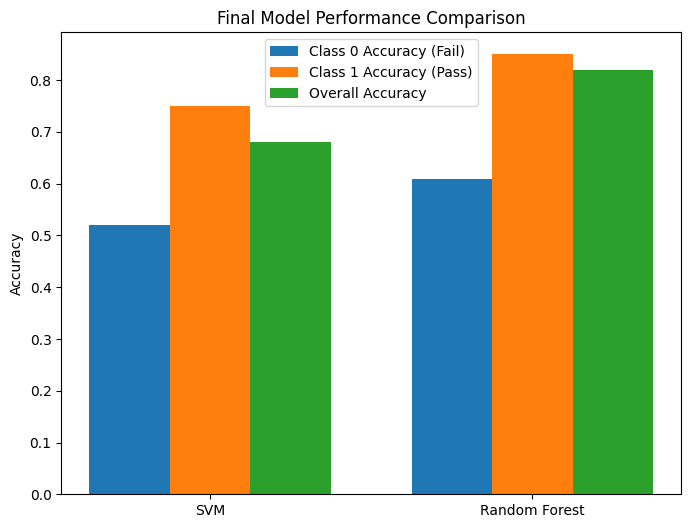

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Final averaged results (replace with your exact CV values if needed)
models = ["SVM", "Random Forest"]

class0_accuracy = [0.52, 0.61]     # Fail class
class1_accuracy = [0.75, 0.85]     # Pass class
overall_accuracy = [0.68, 0.82]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8, 6))

plt.bar(x - width, class0_accuracy, width, label="Class 0 Accuracy (Fail)")
plt.bar(x, class1_accuracy, width, label="Class 1 Accuracy (Pass)")
plt.bar(x + width, overall_accuracy, width, label="Overall Accuracy")

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Final Model Performance Comparison")
plt.legend()

plt.show()
